In [1]:
import sys
import os

# Add the path to `database_scripts` folder
sys.path.append(os.path.abspath("../database_scripts"))
import db_utils as du
import create_tables as ct


conn = ct.create_or_open_database()
df_fahrrad_Zähler = du.fetch_data_df('Standorten_Zählstelle',conn)
df_mess_Fahrrad= du.fetch_data_df('Messdaten_Fahrrad',conn)
df_bezirke= du.fetch_data_df('Bezirke',conn)
df_date = du.fetch_data_df('Date_dim',conn)
df_time = du.fetch_data_df('Time_dim',conn)

Establish SQLite connection.


In [2]:
# in order to make fetching data from the database faster:
#try to use chunksize in the fetch_data . but we have to define parameter 

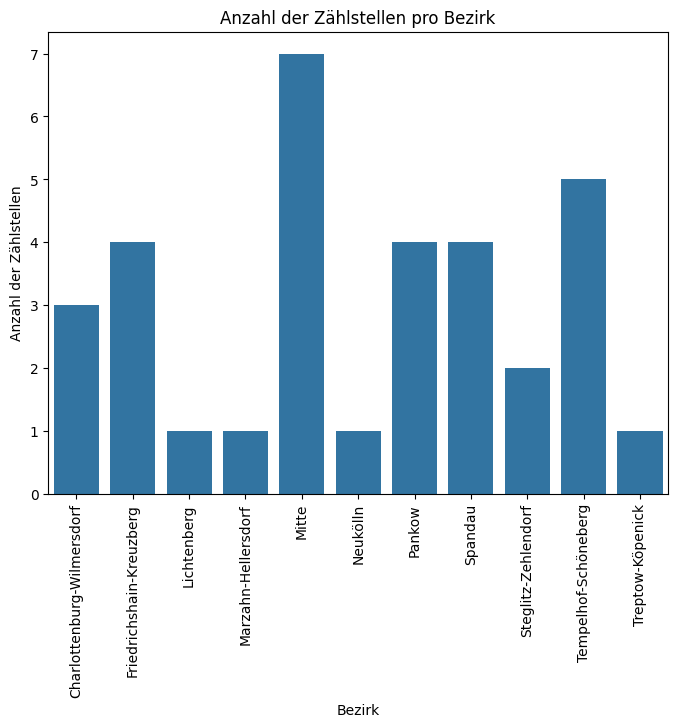

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count the number of Zählstelle per Bezirk

df_merged = pd.merge(df_fahrrad_Zähler, df_bezirke, on="Bezirk", how="inner")
counts = df_merged.groupby('Bezirk')['Zählstelle'].count().reset_index()
counts.rename(columns={'Zählstelle': 'Anzahl_Zählstelle'}, inplace=True)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Bezirk', y='Anzahl_Zählstelle', data=counts)

# Add labels and title
plt.xlabel('Bezirk')
plt.xticks(rotation=90)
plt.ylabel('Anzahl der Zählstellen')
plt.title('Anzahl der Zählstellen pro Bezirk')

# Display the plot
plt.show()


In [4]:
import pandas as pd
df_merged = pd.merge(df_fahrrad_Zähler, df_bezirke, on="Bezirk", how="inner")
df_merged = pd.merge(df_merged, df_mess_Fahrrad, on="Zählstelle", how="inner")
df_merged = pd.merge( df_merged,df_date, on="DateID",how="inner")
df_merged = pd.merge( df_merged,df_time, on="TimeID",how="inner")

In [5]:
df_merged.drop(columns=['Installationsdatum', 'Breitengrad','Beschreibung', 'Längengrad', 'Geometry'],axis=1,  inplace= True)


In [6]:
df_merged.columns

Index(['Zählstelle', 'Bezirk', 'DateID', 'TimeID', 'Wert', 'Date', 'year',
       'month', 'day', 'day_of_the_week', 'is_holiday', 'quarter',
       'time_of_the_day'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns


#X :Month Y: Wert Hue: Bezirke
df_2018 = df_merged[df_merged['year'] == 2018]
df_2022 = df_merged[df_merged['year']== 2022]


In [8]:
print(df_2022['Bezirk'].unique())

['Pankow' 'Mitte' 'Charlottenburg-Wilmersdorf' 'Tempelhof-Schöneberg'
 'Friedrichshain-Kreuzberg' 'Lichtenberg' 'Marzahn-Hellersdorf' 'Spandau'
 'Steglitz-Zehlendorf' 'Neukölln' 'Treptow-Köpenick']


In [9]:
print(df_2018['Bezirk'].unique())

['Pankow' 'Mitte' 'Charlottenburg-Wilmersdorf' 'Tempelhof-Schöneberg'
 'Friedrichshain-Kreuzberg' 'Lichtenberg' 'Marzahn-Hellersdorf' 'Spandau'
 'Steglitz-Zehlendorf' 'Neukölln' 'Treptow-Köpenick']


In [31]:
df_2021 = df_merged[df_merged['year']== 2021]

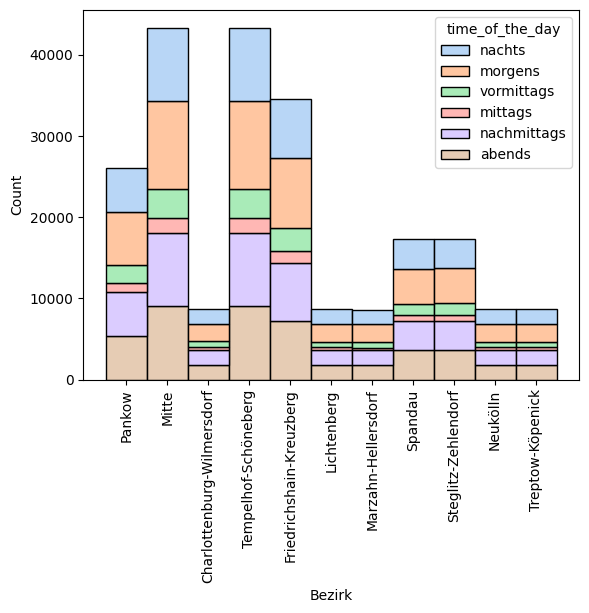

In [33]:

sns.histplot(x ='Bezirk' , data = df_2022, hue = 'time_of_the_day', palette = 'pastel', multiple = 'stack' )
plt.xticks(rotation = 90)
plt.show()

In [35]:
df_2021.columns

Index(['Zählstelle', 'Bezirk', 'DateID', 'TimeID', 'Wert', 'Date', 'year',
       'month', 'day', 'day_of_the_week', 'is_holiday', 'quarter',
       'time_of_the_day', 'week', 'Year-Quarter'],
      dtype='object')

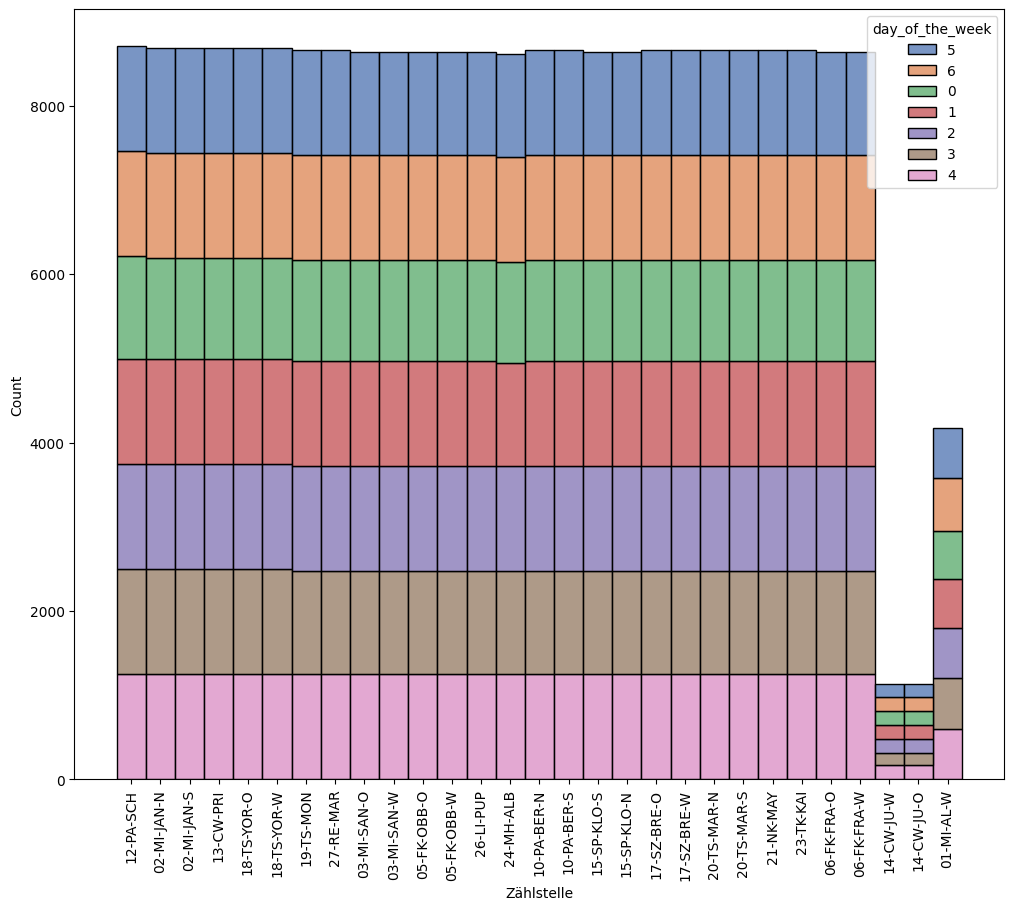

In [38]:
plt.figure(figsize = (12,10))
sns.histplot(x ='Zählstelle' , data =  df_2021, hue = 'day_of_the_week', palette = 'deep', multiple = 'stack' )
plt.xticks(rotation = 90)
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


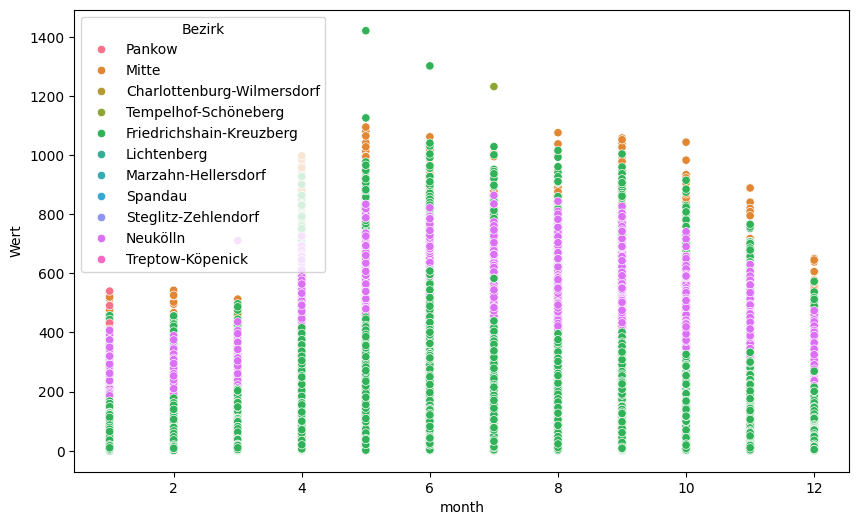

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot( x= df_2018['month'],y=df_2018['Wert'], hue=df_merged['Bezirk'])
plt.show()


In [13]:
df_2018_Mitte=df_2018[df_2018['Bezirk']=='Mitte']

([<matplotlib.axis.XTick at 0x2160ee4ecc0>,
 [Text(0, 0, '0'),
  Text(50, 0, '50'),
  Text(100, 0, '100'),
  Text(150, 0, '150'),
  Text(200, 0, '200'),
  Text(250, 0, '250'),
  Text(300, 0, '300'),
  Text(350, 0, '350'),
  Text(400, 0, '400'),
  Text(450, 0, '450')])

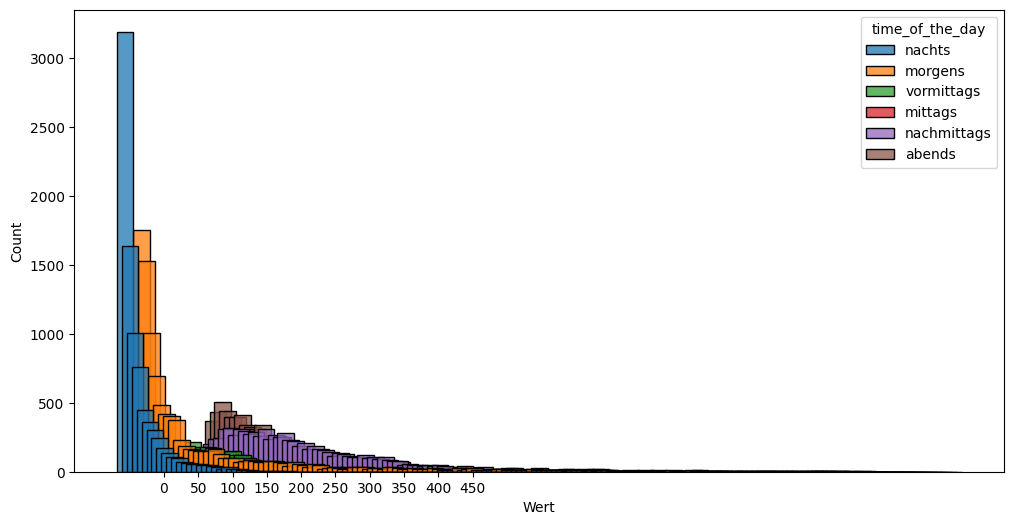

In [14]:
plt.figure(figsize=(12, 6)) 
sns.histplot(data=df_2018_Mitte, x='Wert',
             multiple='dodge', stat='count',hue ='time_of_the_day', element='bars',shrink=20)
plt.xticks(range(0,500,50),range(0,500,50))

Text(0.5, 0, 'Uhrzeit ( stunde)')

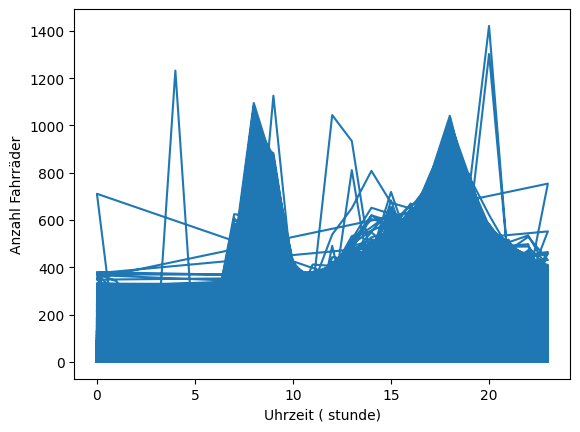

In [15]:
plt.plot(df_2018['TimeID'],df_2018['Wert'])
plt.ylabel('Anzahl Fahrräder')
plt.xlabel('Uhrzeit ( stunde)')

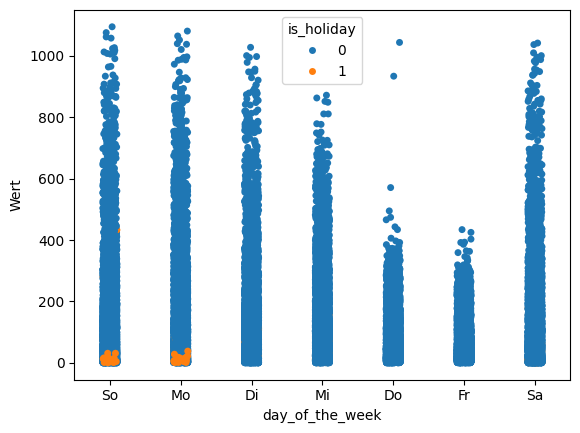

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.stripplot(x='day_of_the_week', y='Wert', data=df_2018_Mitte, jitter=True, hue ='is_holiday')
plt.xticks(ticks=[1,2,3,4,5,6,0], labels=['Mo','Di','Mi','Do','Fr','Sa','So'])
plt.show()

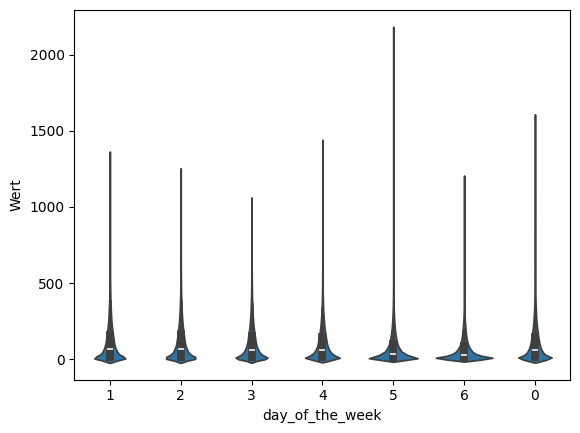

In [17]:
import seaborn as sns
sns.violinplot(x='day_of_the_week', y='Wert', data=df_merged)
plt.show()


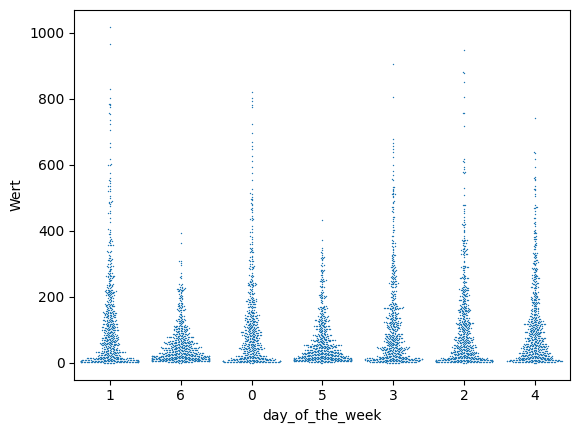

In [18]:
sampled_data = df_2018_Mitte.sample(frac=0.1, random_state=42)  # 10% of the data
sns.swarmplot(x='day_of_the_week', y='Wert', data=sampled_data, size = 1)
plt.show()


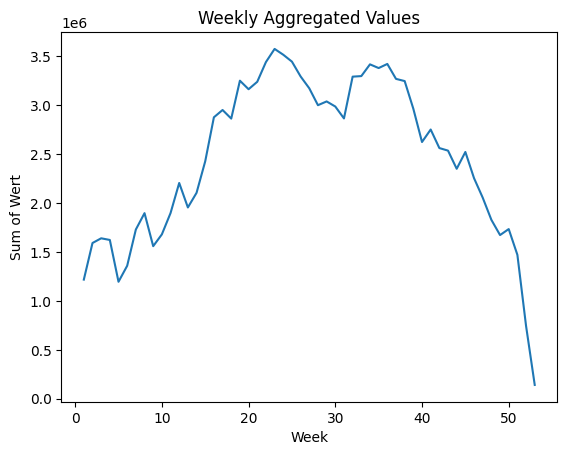

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_merged['Date'] is already in datetime format or needs conversion
df_merged['Date'] = pd.to_datetime(df_merged['Date'], format='%d.%m.%Y')

# Extract calendar week from 'Date' column
df_merged['week'] = df_merged['Date'].dt.isocalendar().week

# Aggregate the 'Wert' column by week
weekly_df = df_merged.groupby('week').agg({'Wert': 'sum'}).reset_index()

# Plot the aggregated values by week
plt.plot(weekly_df['week'], weekly_df['Wert'])
plt.xlabel('Week')
plt.ylabel('Sum of Wert')
plt.title('Weekly Aggregated Values')
plt.show()


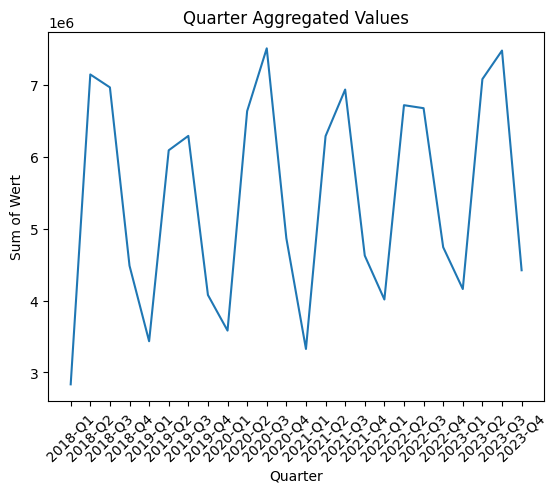

In [20]:
#show quartal
import pandas as pd
import matplotlib.pyplot as plt

# Combine 'year' and 'quarter' into a new column 'Year-Quarter'
df_merged['Year-Quarter'] = df_merged['year'].astype(str) + '-Q' + df_merged['quarter'].astype(str)

# Aggregate the 'Wert' column by 'Year-Quarter'
quarterly_df = df_merged.groupby('Year-Quarter').agg({'Wert': 'sum'}).reset_index()

# Plot the aggregated values by 'Year-Quarter'
plt.plot(quarterly_df['Year-Quarter'], quarterly_df['Wert'])
plt.xlabel('Quarter')
plt.ylabel('Sum of Wert')
plt.title('Quarter Aggregated Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_39432\2320063966.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Holiday')


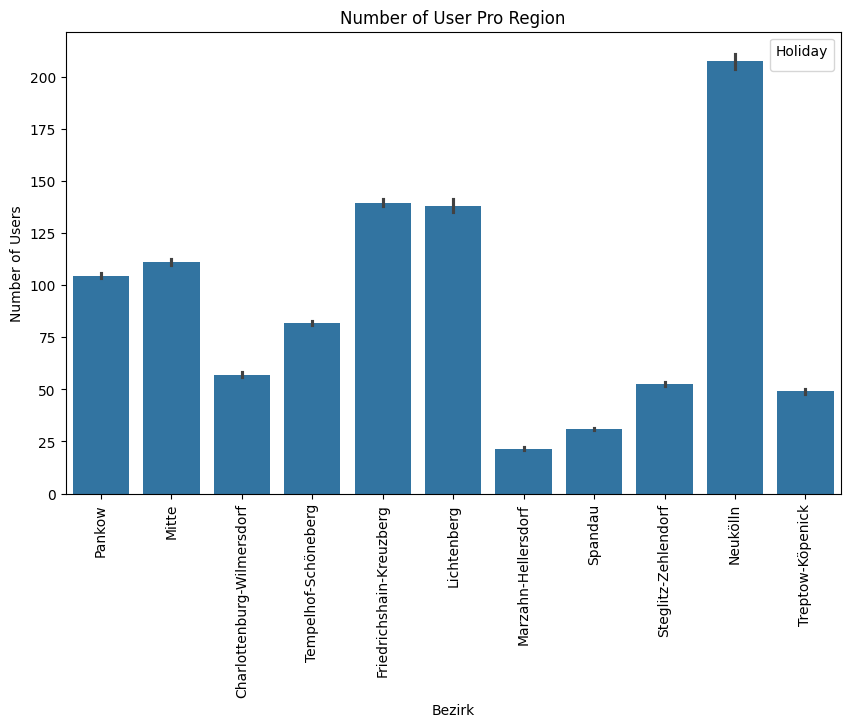

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Bezirk', y='Wert',  data=df_2018)
plt.title('Number of User Pro Region')
plt.xlabel('Bezirk')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.show()

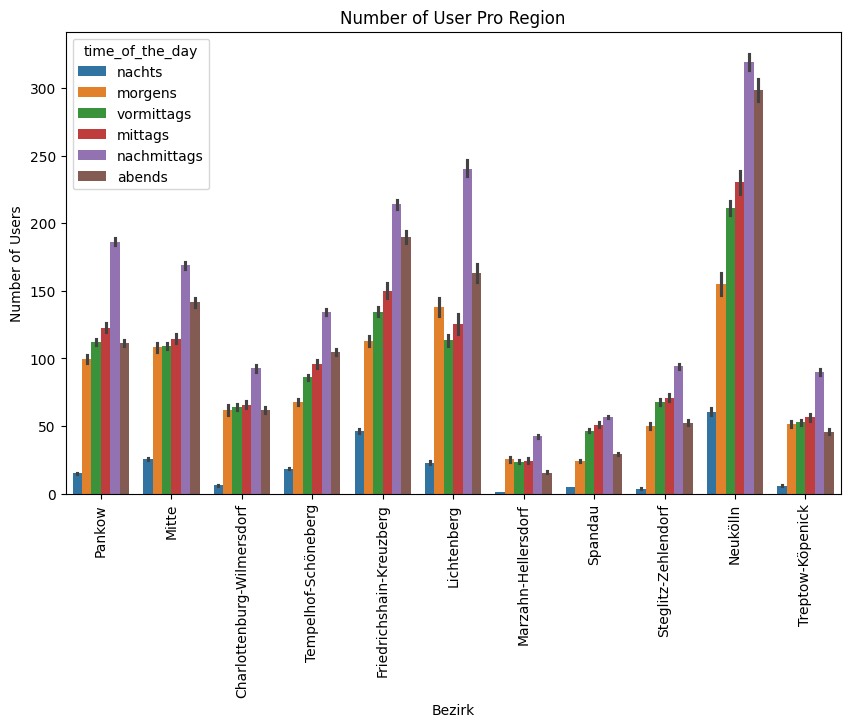

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Bezirk', y='Wert',  data=df_2018,hue='time_of_the_day')
plt.title('Number of User Pro Region')
plt.xlabel('Bezirk')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.show()

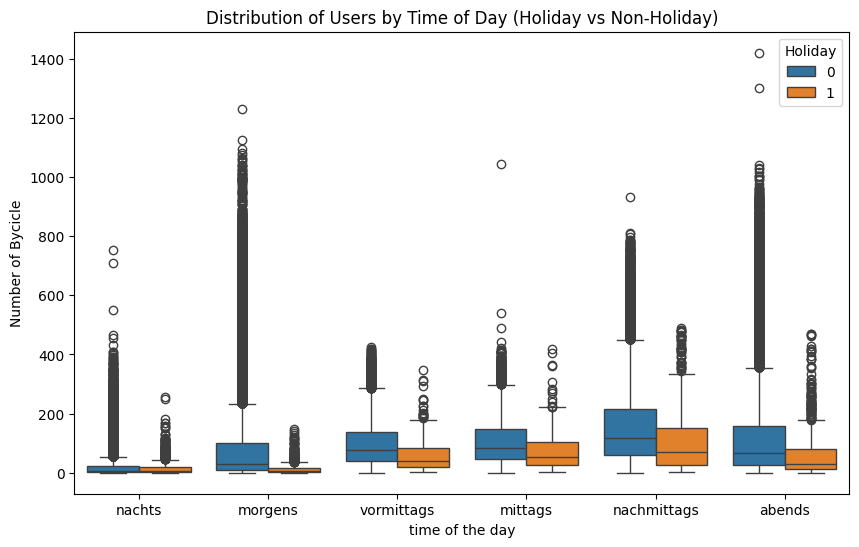

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_the_day', y='Wert', hue='is_holiday', data=df_2018)
plt.title('Distribution of Users by Time of Day (Holiday vs Non-Holiday)')
plt.xlabel('time of the day')
plt.ylabel('Number of Bycicle')
plt.legend(title='Holiday')
plt.show()


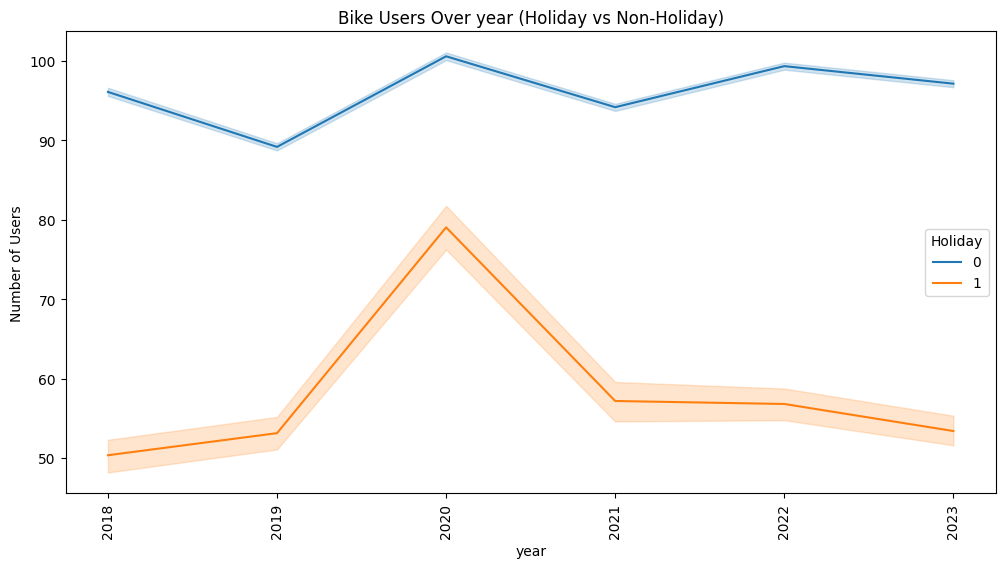

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Wert', hue='is_holiday', data=df_merged)
plt.title('Bike Users Over year (Holiday vs Non-Holiday)')
plt.xlabel('year')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.legend(title='Holiday')
plt.show()


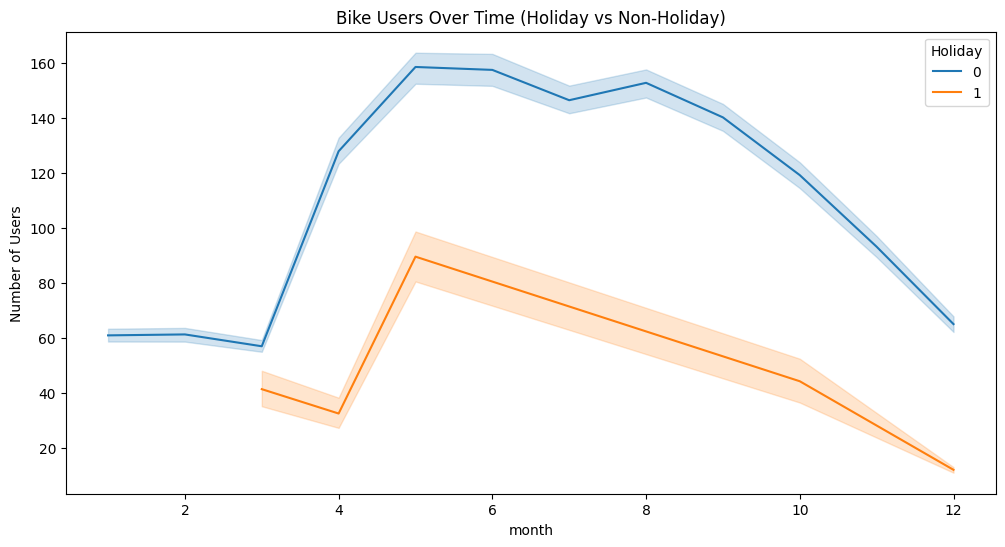

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Wert', hue='is_holiday', data=df_2018_Mitte)
plt.title('Bike Users Over Time (Holiday vs Non-Holiday)')
plt.xlabel('month')
plt.ylabel('Number of Users')
plt.legend(title='Holiday')
plt.show()

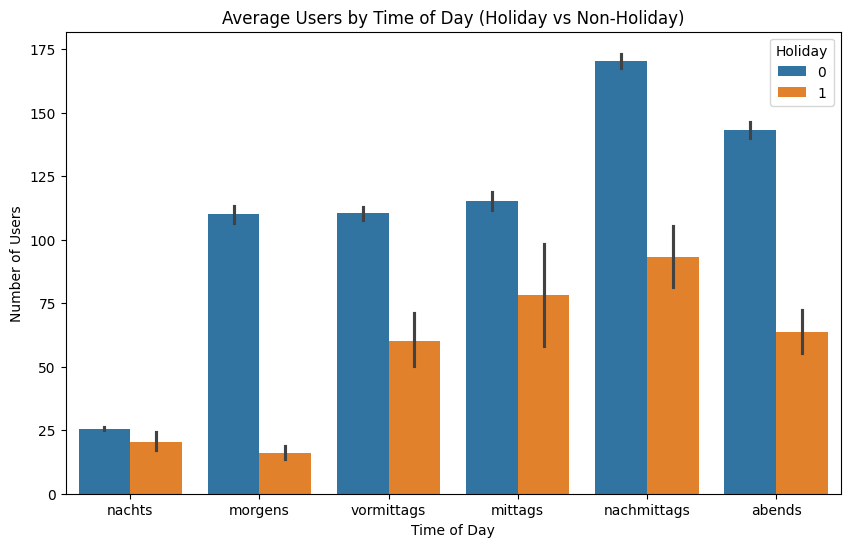

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_the_day', y='Wert', hue='is_holiday', data=df_2018_Mitte)
plt.title('Average Users by Time of Day (Holiday vs Non-Holiday)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Users')
plt.legend(title='Holiday')
plt.show()

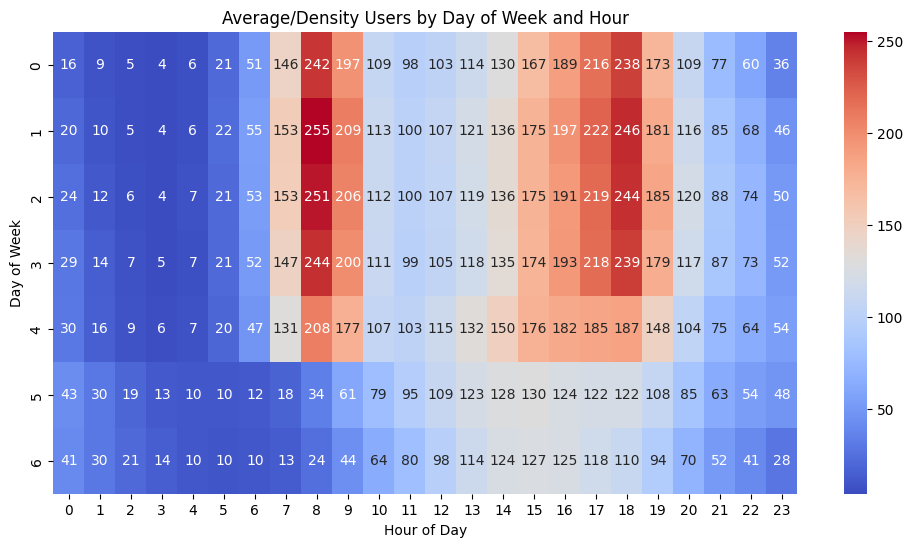

In [27]:
# Pivot table: rows = day, columns = hour, values = mean users
pivot = df_2018.pivot_table(values='Wert', index='day_of_the_week', columns='TimeID', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Average/Density Users by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()
